In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [3]:
data=pd.read_csv('data.csv')
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


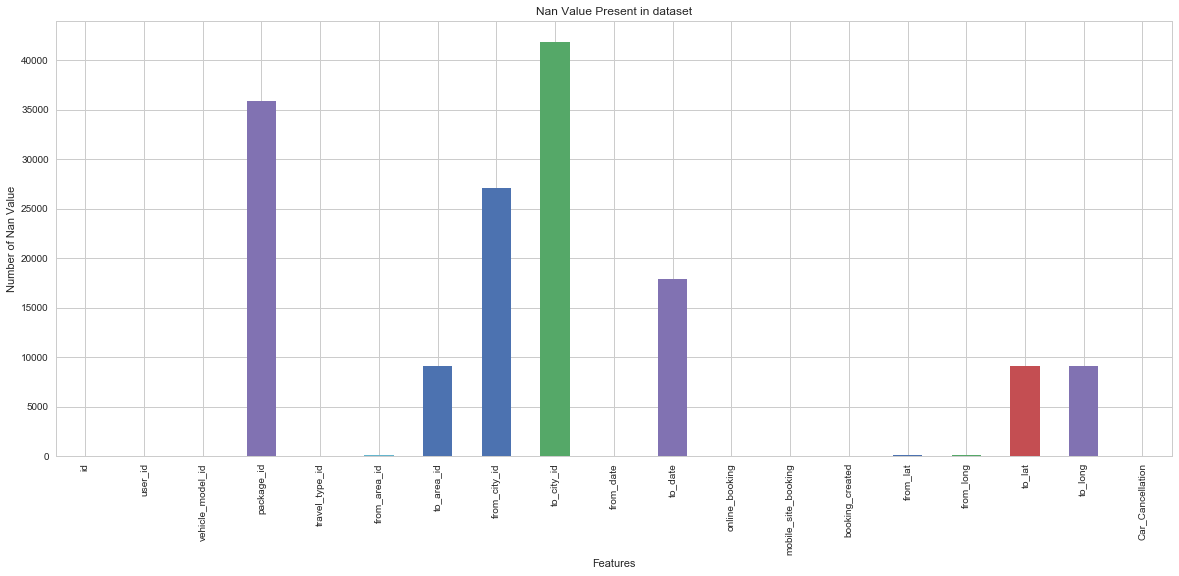

In [4]:
data.isna().sum().plot.bar(figsize=(20,8))
plt.title("Nan Value Present in dataset")
plt.ylabel("Number of Nan Value")
plt.xlabel("Features")
plt.show()

In [5]:
print("Percentage of Null Value in Dataset")
for i in range(len(data.isna().sum())):
    print(data.isna().sum().index[i],data.isna().sum()[i]/data.shape[0]*100,"%")

Percentage of Null Value in Dataset
id 0.0 %
user_id 0.0 %
vehicle_model_id 0.0 %
package_id 82.61610370472704 %
travel_type_id 0.0 %
from_area_id 0.20262024820980407 %
to_area_id 21.0402707743317 %
from_city_id 62.365591397849464 %
to_city_id 96.34362552094127 %
from_date 0.0 %
to_date 41.19177545992494 %
online_booking 0.0 %
mobile_site_booking 0.0 %
booking_created 0.0 %
from_lat 0.21413276231263384 %
from_long 0.21413276231263384 %
to_lat 21.0402707743317 %
to_long 21.0402707743317 %
Car_Cancellation 0.0 %


# Analysing the Travel Type

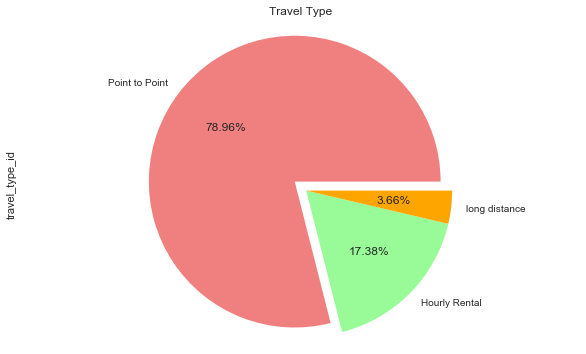

The dataset is highly skewed towards Point to Point travel


In [6]:
data['travel_type_id'].value_counts().plot(kind='pie',figsize=(10,6), 
title="Travel Type", autopct='%1.2f%%',labels=['Point to Point','Hourly Rental','long distance'],
                                           colors=['lightcoral','palegreen','orange'],explode = (0.1, 0, 0))
plt.axis('equal')
plt.show()
print("The dataset is highly skewed towards Point to Point travel")

# Cancellation Factors
## It plays a important role causing driver huge loss and annoying the riders 

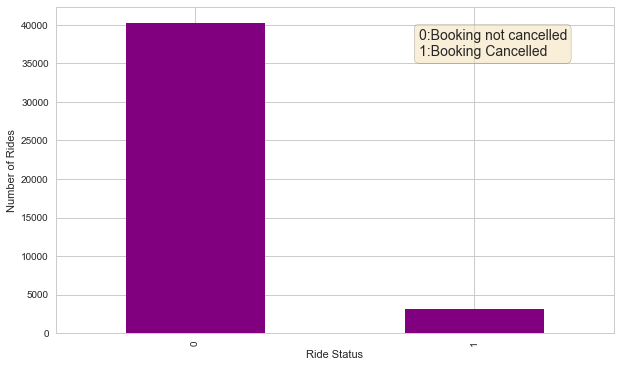

We can overcome the problem of Cancellation by find the area where demand is high


In [7]:
## lets analysis the Cancellation
data['Car_Cancellation'].value_counts().plot.bar(x='Ride Status', y='Number of Rides',figsize = (10,6), color='purple')
plt.xlabel('Ride Status')
plt.ylabel('Number of Rides')
textstr = '\n'.join((
    '0:Booking not cancelled',
    '1:Booking Cancelled'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.annotate(textstr, xy=(0.65, 0.85), xycoords='axes fraction',bbox=props,fontsize=14)
#plt.text(0.85, 0,textstr,fontsize=14,bbox=props)
plt.show()
print("We can overcome the problem of Cancellation by find the area where demand is high")

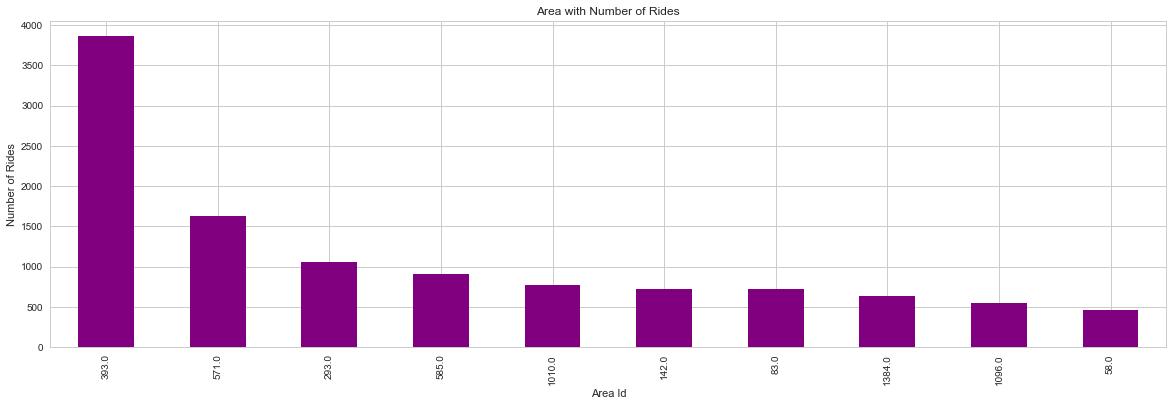

In [8]:
data['from_area_id'].value_counts().head(10).plot.bar(figsize = (20,6), color='purple')
plt.title('Area with Number of Rides')
plt.xlabel("Area Id")
plt.ylabel('Number of Rides')
plt.show()
#print("We will analyse this data only for city_id 15.0 to find the demands in an area or with time of day")

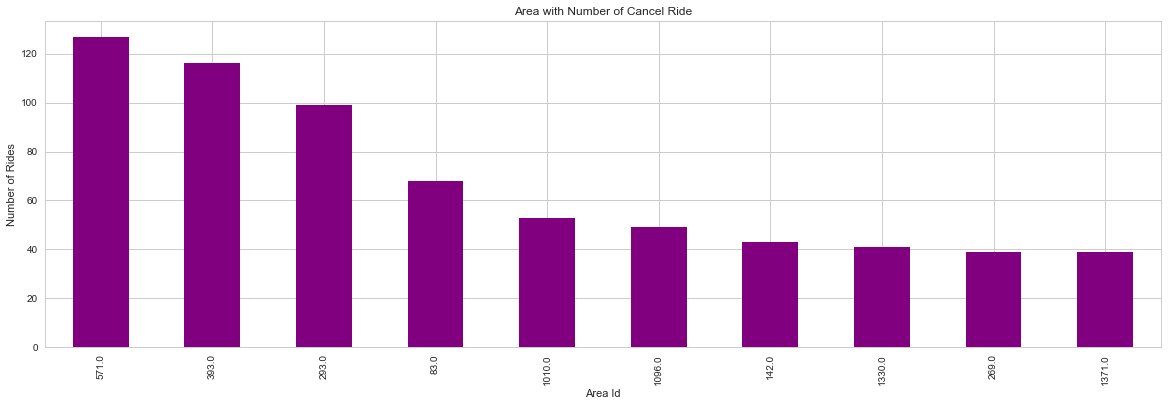

In [9]:
data[data['Car_Cancellation']==1]['from_area_id'].value_counts().head(10).plot.bar(figsize = (20,6), color='purple')
plt.title("Area with Number of Cancel Ride")
plt.xlabel("Area Id")
plt.ylabel('Number of Rides')
plt.show()

In [10]:
# Import Tableau Visualisation 
from IPython.display import IFrame
IFrame('https://public.tableau.com/shared/897J56FPN?:display_count=yes', width=1000, height=925)

In [11]:
import datetime
dictionary_weekday= days = { 0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
def createDate(date):
    return date.split(' ')[0]
def createTime(time):
    exactTime=time.split(' ')[1]
    return int(exactTime.split(':')[0])
def createDay(date):
    store=date.split('/')
    weekday=datetime.date(int(store[2]),int(store[0]),int(store[1])).weekday()
    return dictionary_weekday.get(weekday)
    

In [12]:
data['start_date']=data['from_date'].apply(createDate)
data['start_time']=data['from_date'].apply(createTime)
data['start_day']=data['start_date'].apply(createDay)

In [13]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,start_date,start_time,start_day
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,...,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1/1/2013,2,Tuesday
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1/1/2013,9,Tuesday
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,...,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1/1/2013,3,Tuesday
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,...,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1/1/2013,5,Tuesday
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1/1/2013,9,Tuesday


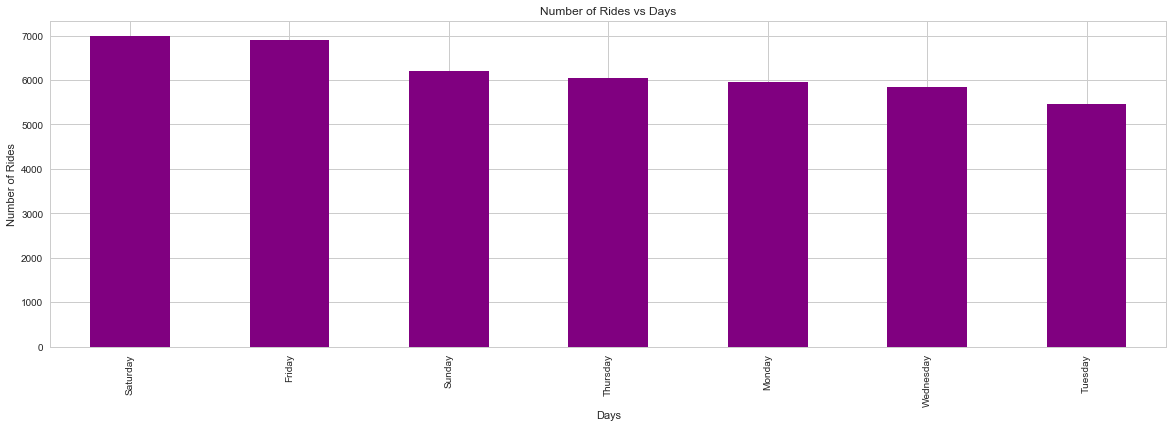

In [14]:
data['start_day'].value_counts().plot.bar(figsize = (20,6), color='purple')
plt.title('Number of Rides vs Days')
plt.xlabel("Days")
plt.ylabel("Number of Rides")
plt.show()

#  Saturday

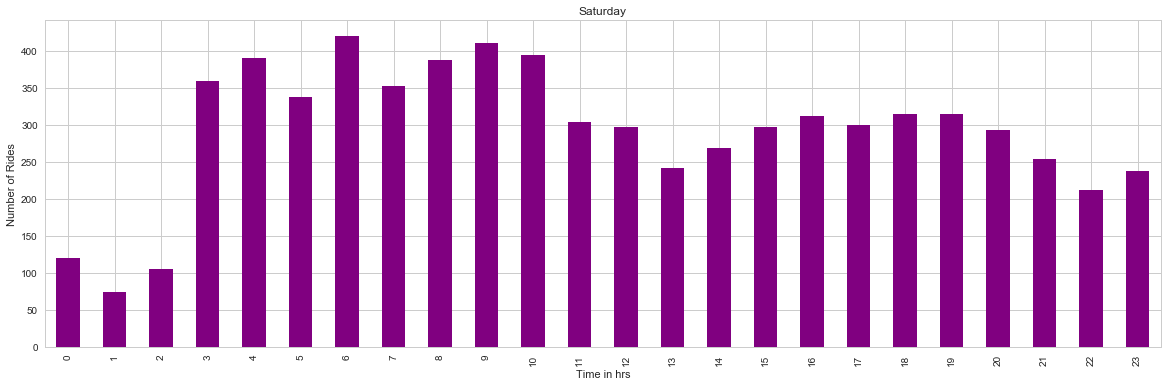

In [56]:
## Lets analysis for each day to find the peak time of each day
day_saturday=data[data['start_day']=='Saturday']
day_saturday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Saturday')
plt.xlabel("Time in hrs")
plt.ylabel("Number of Rides")
plt.show()

In [16]:
area_dict={393:"Transport:-Airport",571:"Office Area:-Marthahali",142:"Residential Area:-BTM 2nd Stage",293:"Office Area:-Electronic City",
           585:"Transport:-Bus Station",1096:"Office Area:-Brookefield",
           83:"Residential Area:-Bellandur",1010:"Office Area:-Whitefield",1384:"Market Area:-Yeswanthpur"
           ,1017:"Residential Area:-Yelahanka"}

In [17]:
area_code_sat=day_saturday['from_area_id'].value_counts().head(10).index

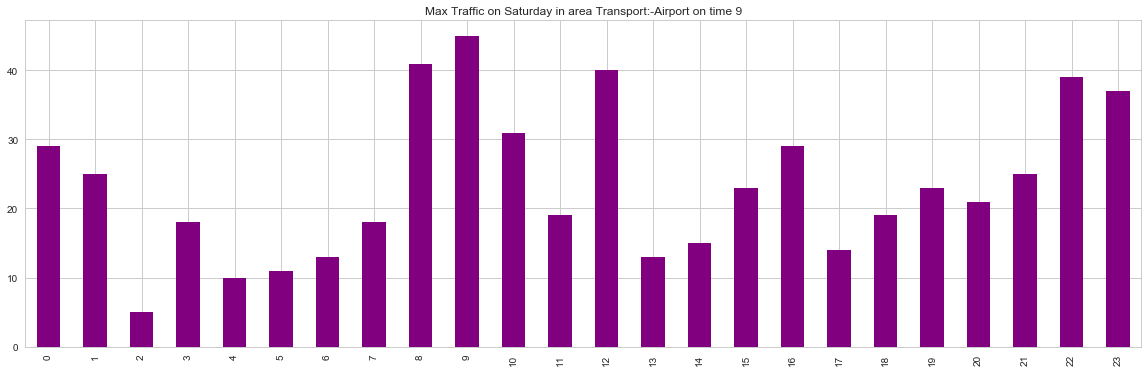

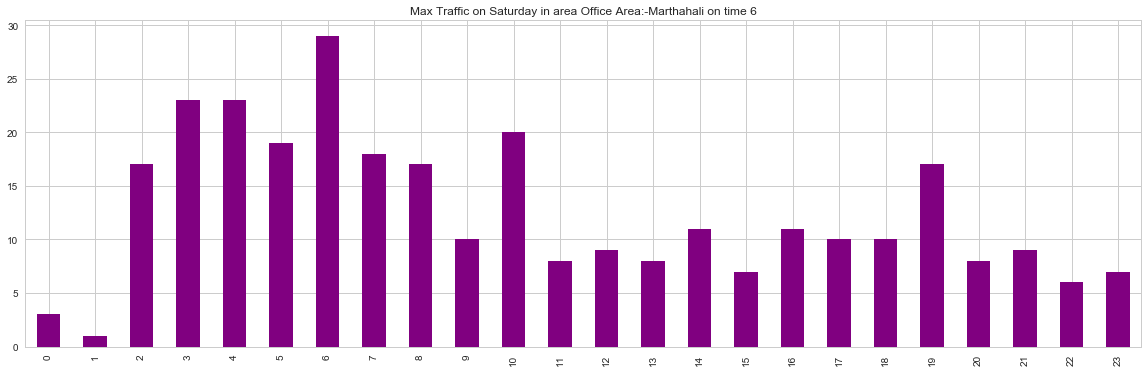

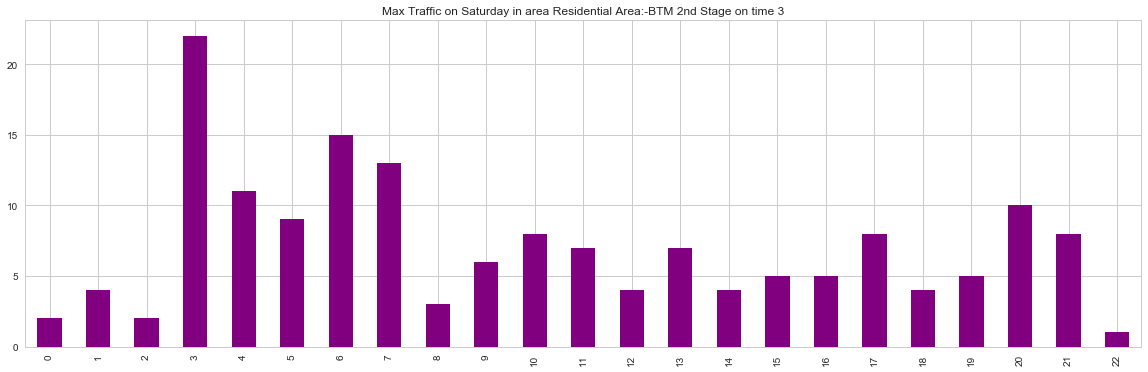

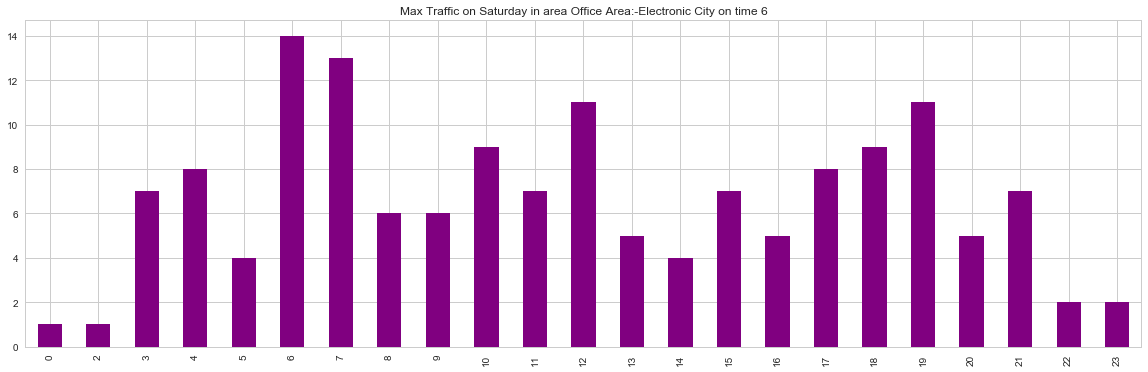

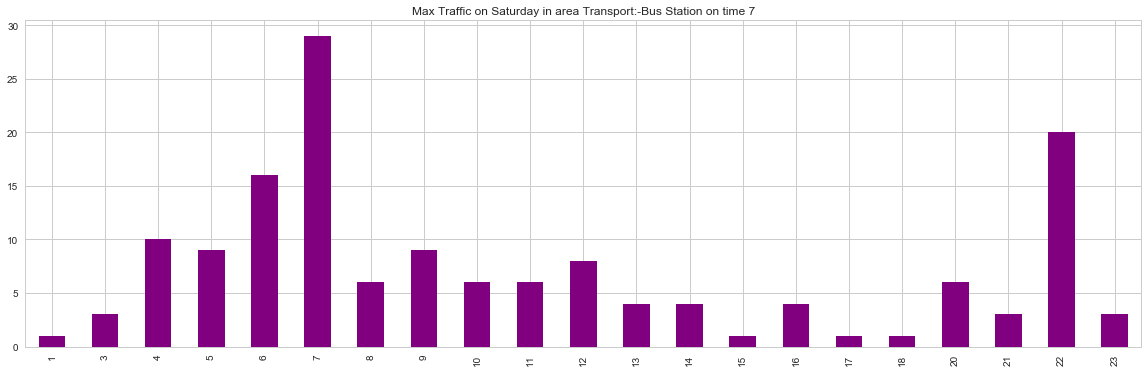

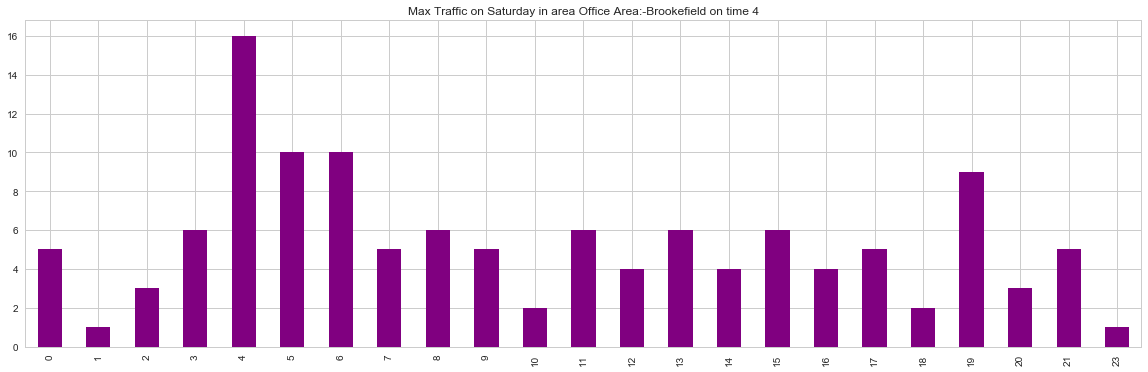

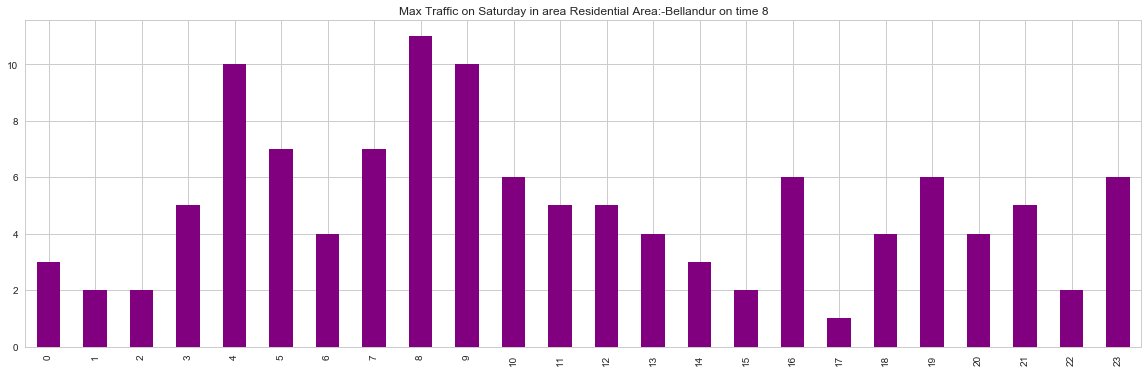

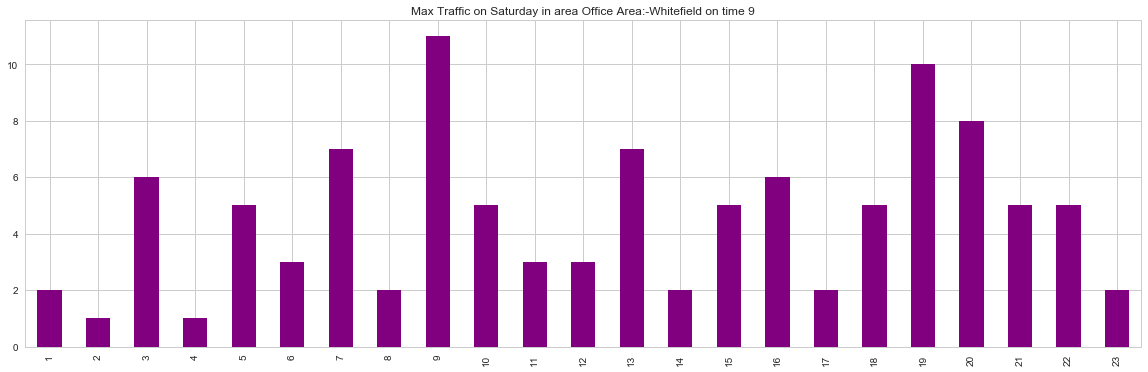

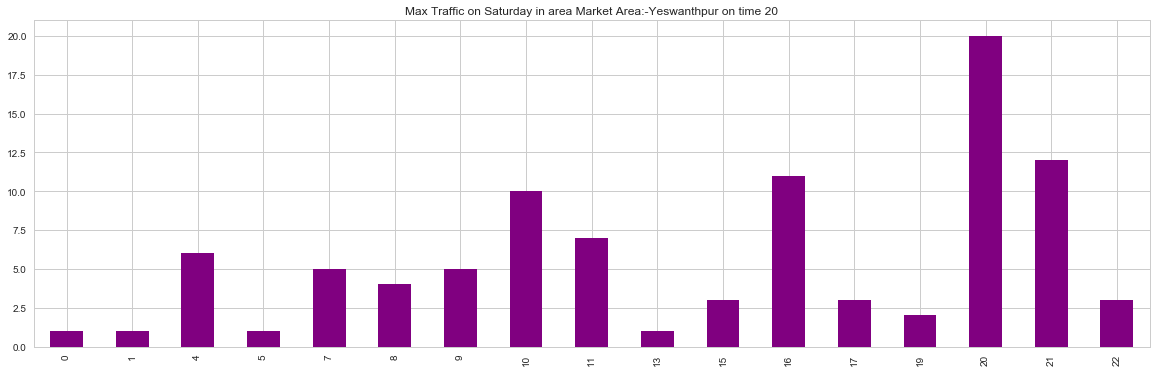

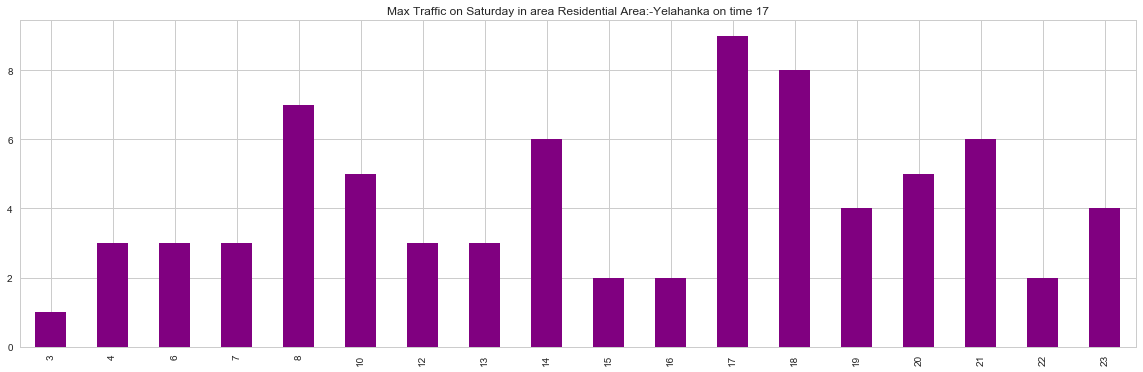

In [18]:
for i in area_code_sat:
    day_saturday[day_saturday['from_area_id']==i]['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
    plt.title("Max Traffic on Saturday in area "+area_dict.get(i)+" on time "+str(day_saturday[day_saturday['from_area_id']==i]['start_time'].value_counts().index[0]))
    plt.show()

# Inference of Above Graph on Saturday
## For Office Area in Bangalore Most of Traffic :
### ->Marthahali 3:00AM -7:00 AM
### ->Electronic City 6:00AM-8:00 AM
### ->Brookefield 4:00 AM- 6:00 AM
### ->Whitefield 9:00 AM-10:00 AM

## For Residental Area in Bangalore Most of Traffic: 
### ->Bellandur 3:00 -5:00
### ->BTM 2nd Stage 3:00 - 5:00
### ->Yelahanka 17:00 - 19:00

## For Market Area in Bangalore Most of Traffic: (20:00 - 22:00)
### Yeswanthpur: 20:00 - 22:00

## For Transport Area in Bangalore Most of Traffic:
### ->Airport: 8:00A.M - 10:00 A.M
### ->Bus Station 6:00A.M - 8:00 A.M

# Increase the supply of Cab in this specfic area in this time-slot Since demand is very much high on Saturday
## Generally Saturday is Holiday for offices 

# Friday

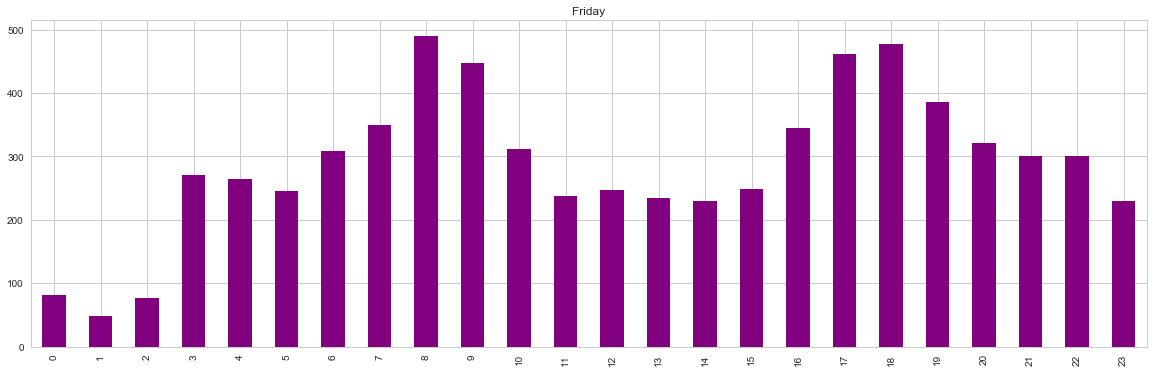

In [19]:
## Lets analysis for each day to find the peak time of each day
day_friday=data[data['start_day']=='Friday']
day_friday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Friday')
plt.show()

## On Friday the peak time usually 7:00- 10:00 and 17:00 - 19: 00 all over bangalore

In [20]:
area_code_fri=day_friday['from_area_id'].value_counts().head(10).index
area_dict[58]='Office Area: Arekere'

# Area Wise Analysis

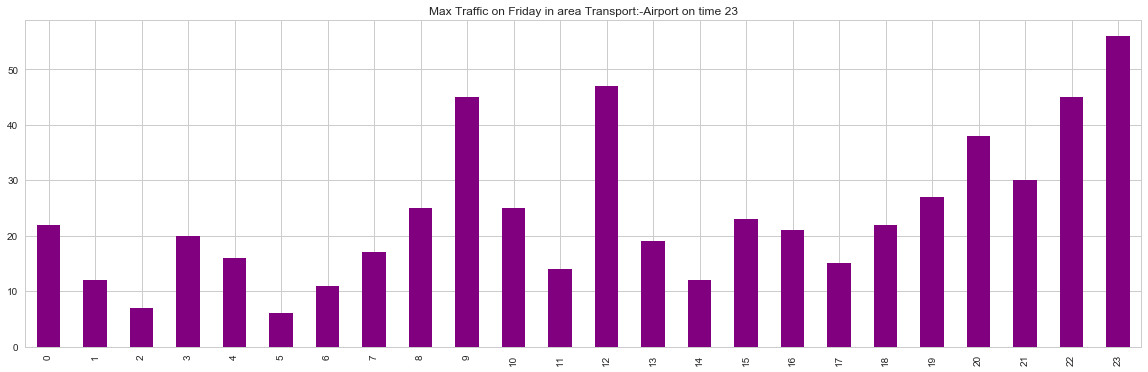

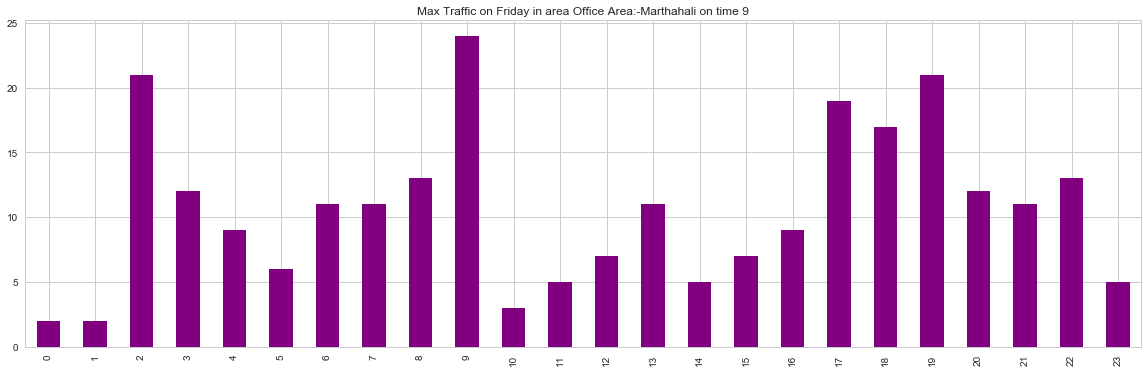

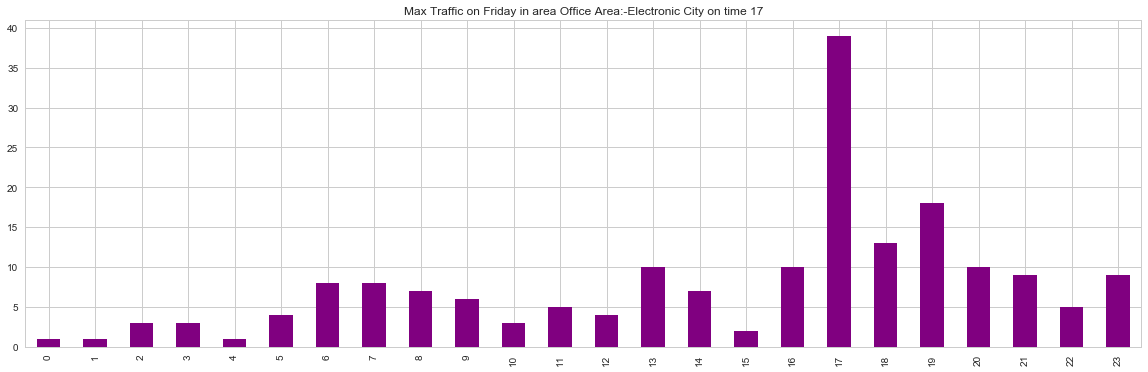

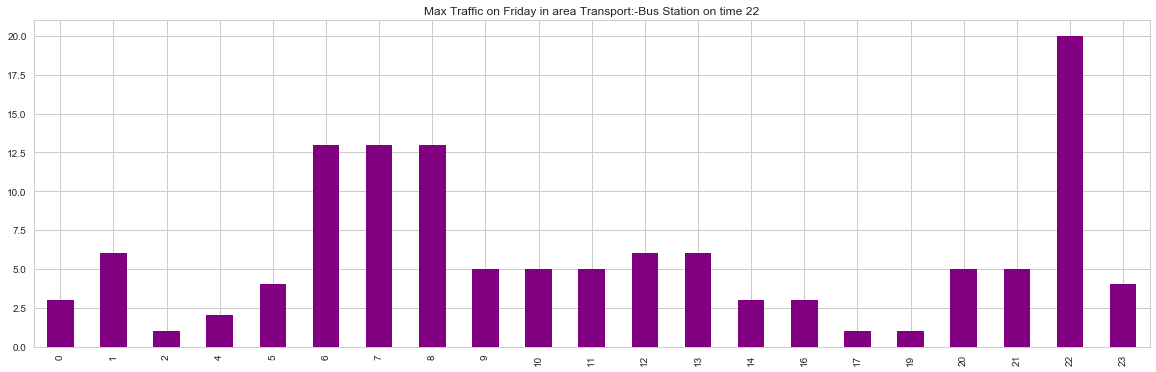

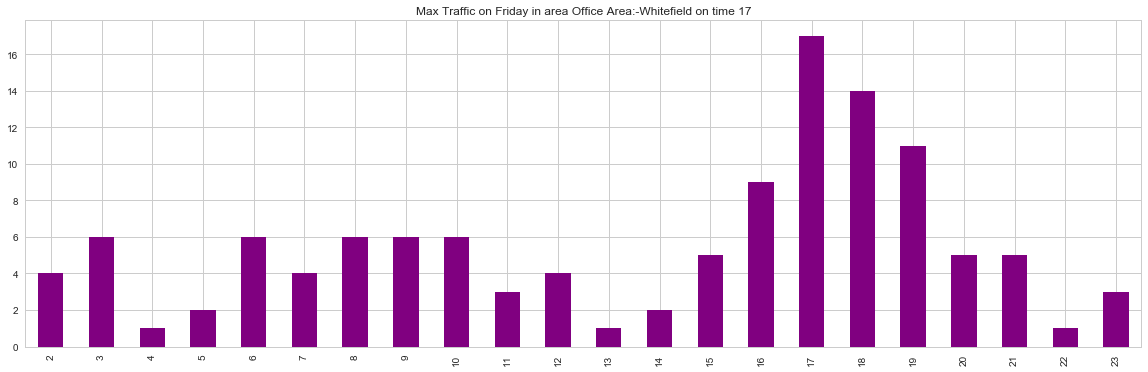

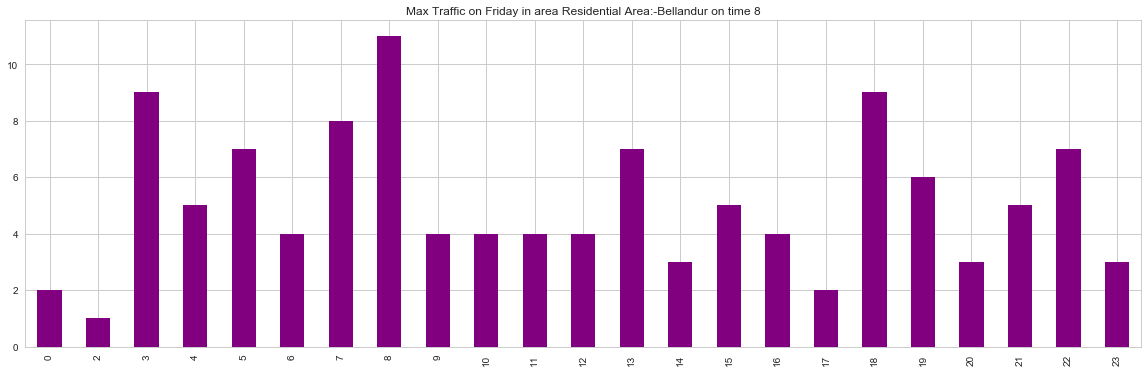

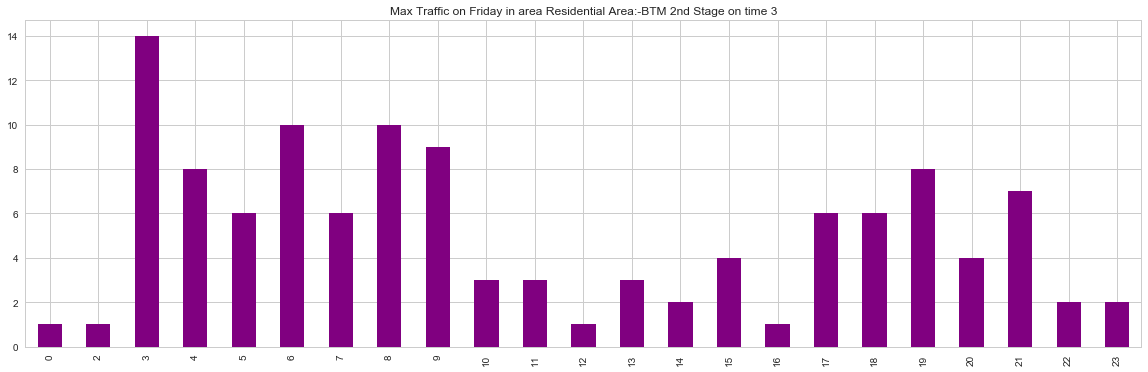

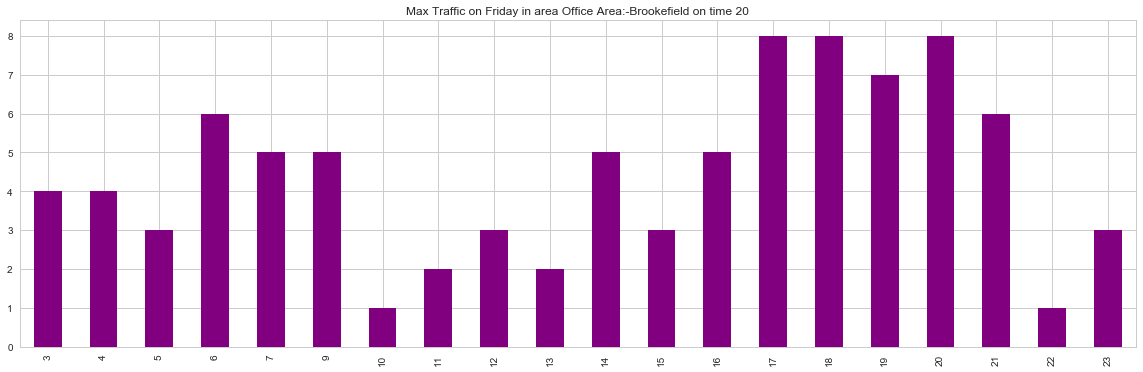

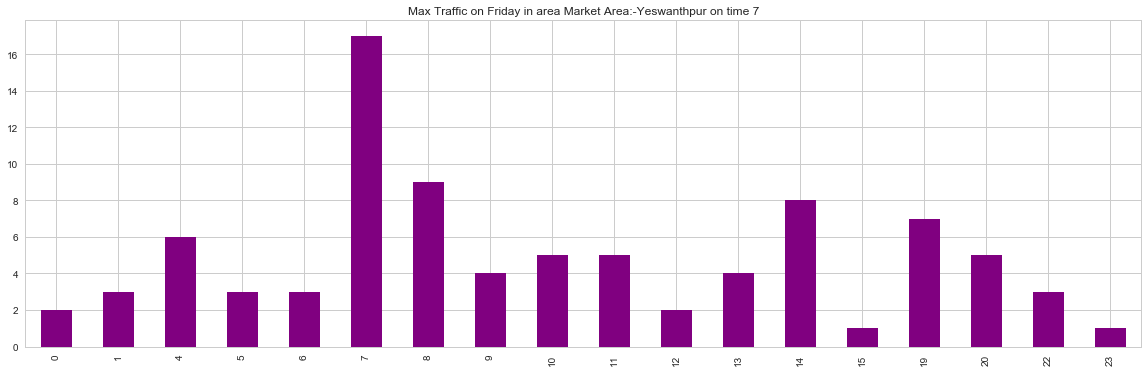

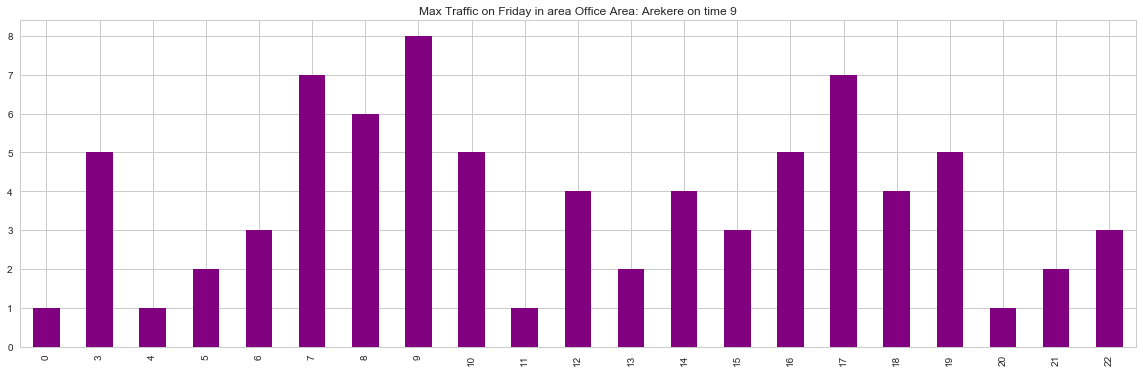

In [21]:
for i in area_code_fri:
    day_friday[day_friday['from_area_id']==i]['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
    plt.title("Max Traffic on Friday in area "+area_dict.get(i)+" on time "+str(day_friday[day_friday['from_area_id']==i]['start_time'].value_counts().index[0]))
    plt.show()

# Inference of Above Graph on Friday
## For Office Area in Bangalore Most of Traffic :
### ->Marthahali 2:00 AM-3:00 AM and  8:00 AM-10:00 AM and 17:00 - 20:00
### ->Electronic City 17:00 - 19:00
### ->Brookefield  17:00 - 21:00
### ->Whitefield 17:00 - 19:00
### -> Arekere 7:00 - 10: 00 

## For Residental Area in Bangalore Most of Traffic: 
### ->Bellandur 7:00 -9:00, 18:00- 20:00
### ->BTM 2nd Stage 3:00 - 5:00

## For Market Area in Bangalore Most of Traffic: 
### Yeswanthpur: 7:00 - 8:00

## For Transport Area in Bangalore Most of Traffic:
### ->Airport: 22:00 - 0:00
### ->Bus Station 22:00 - 23:00 

# Increase the supply of Cab in this specfic area in this time-slot Since demand is very much high on Friday



# Thursday

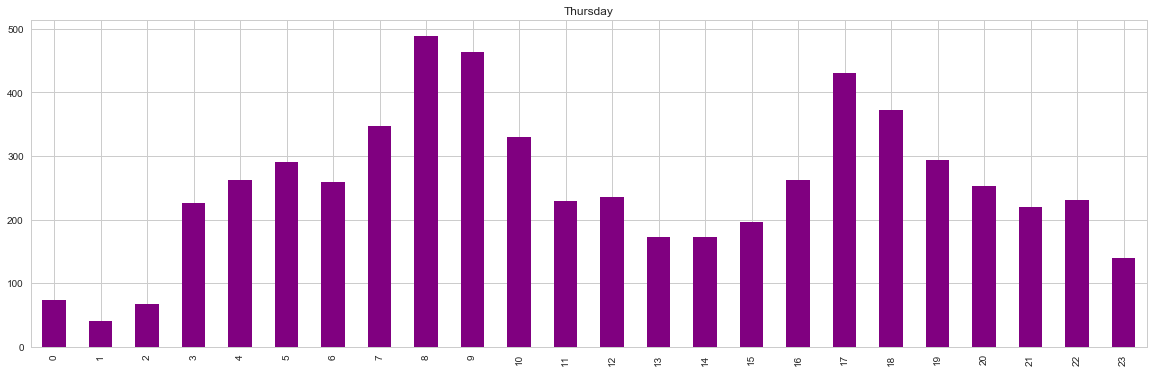

In [22]:
## Lets analysis for each day to find the peak time of each day
day_thursday=data[data['start_day']=='Thursday']
day_thursday ['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Thursday')
plt.show()

## On Thursday the peak time is 8:00 -10:00 and 17:00 -19:00 all over bangalore

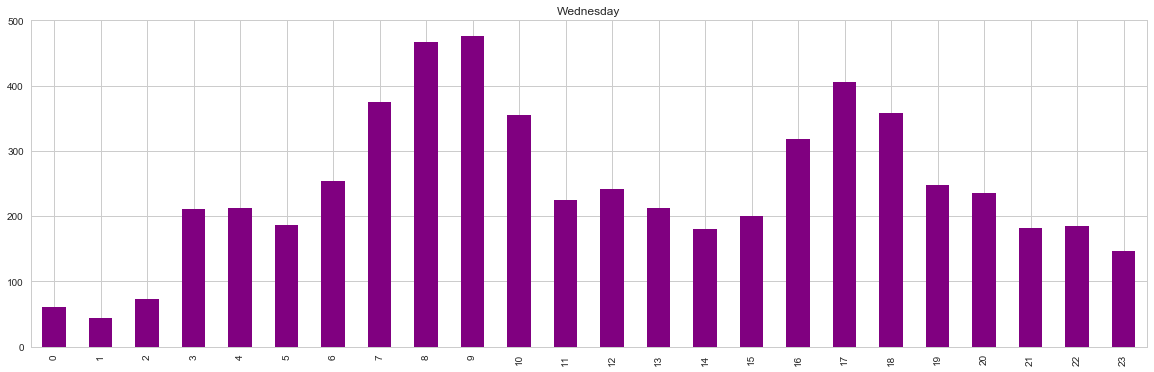

In [23]:
## Lets analysis for each day to find the peak time of each day
day_wednesday=data[data['start_day']=='Wednesday']
day_wednesday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Wednesday')
plt.show()

## On Wednesday the peak time is 8:00 -10:00 and 17:00 -19:00 all over bangalore

# Tuesday

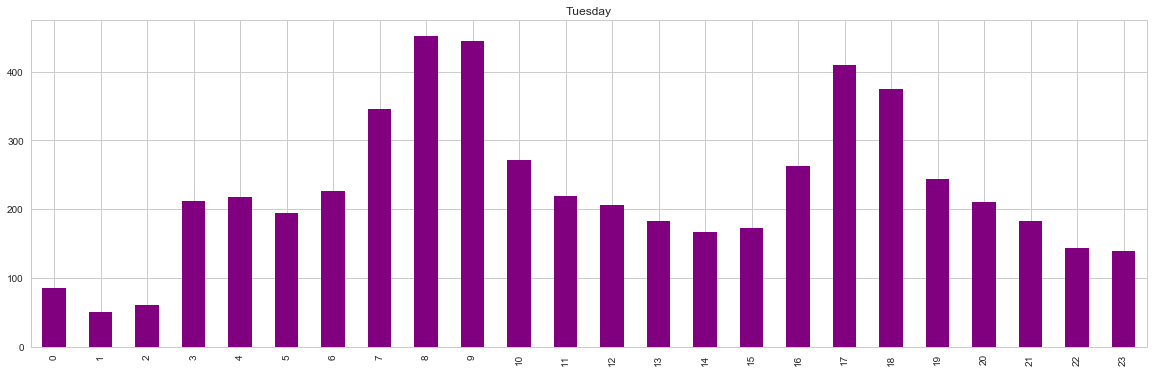

In [24]:
## Lets analysis for each day to find the peak time of each day
day_tuesday=data[data['start_day']=='Tuesday']
day_tuesday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Tuesday')
plt.show()

## On Tuesday the peak time is 8:00 -10:00 and 17:00 -19:00 all over bangalore

# Monday

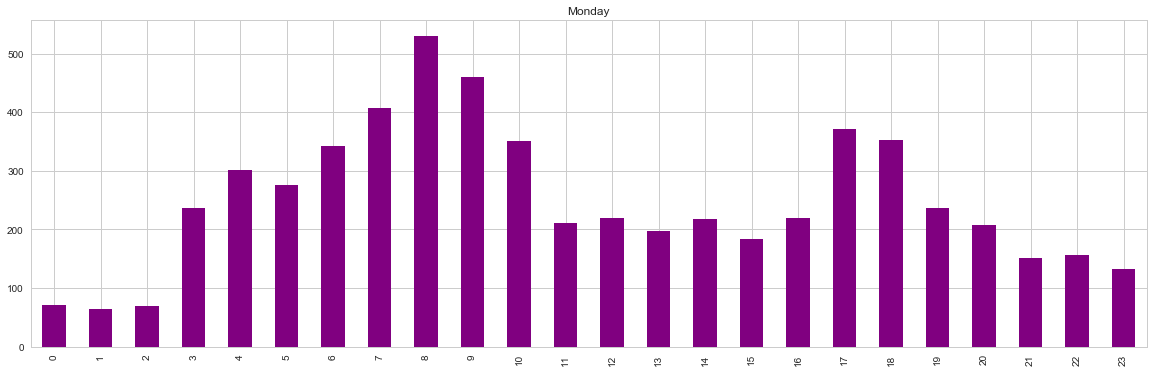

In [25]:
## Lets analysis for each day to find the peak time of each day
day_monday=data[data['start_day']=='Monday']
day_monday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Monday')
plt.show()

## On Monday the peak time is 8:00 -10:00 and 17:00 -19:00 all over bangalore

# Area Wise Analysis for Weekdays i.e Monday to Friday follows same pattern

# Sunday

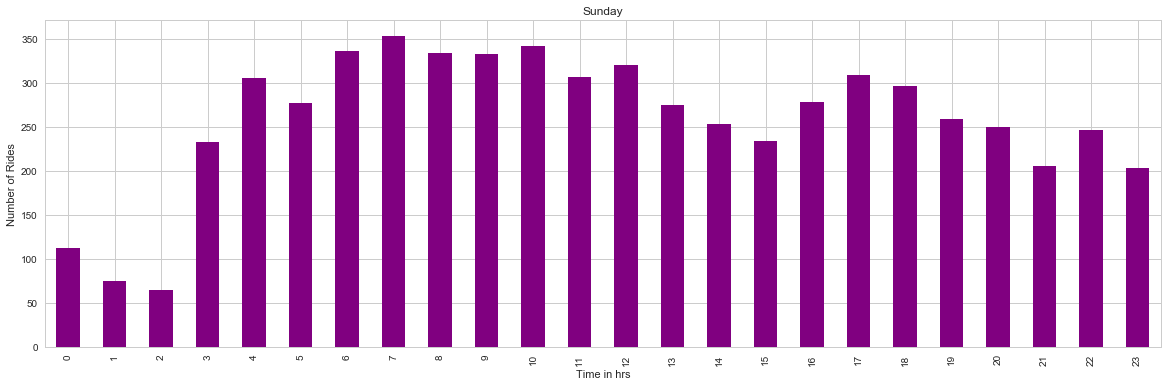

In [62]:
## Lets analysis for each day to find the peak time of each day
day_sunday=data[data['start_day']=='Sunday']
day_sunday['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
plt.title('Sunday')
plt.xlabel("Time in hrs")
plt.ylabel("Number of Rides")
plt.show()

## On Sunday there is  holiday so there is so much demand of cab, so there is no peak time 

## Area Wise Analysis

In [27]:
area_code_sun=day_sunday['from_area_id'].value_counts().head(10).index

In [28]:
area_dict[1371]='Residential Area:-Dooravani Nagar'

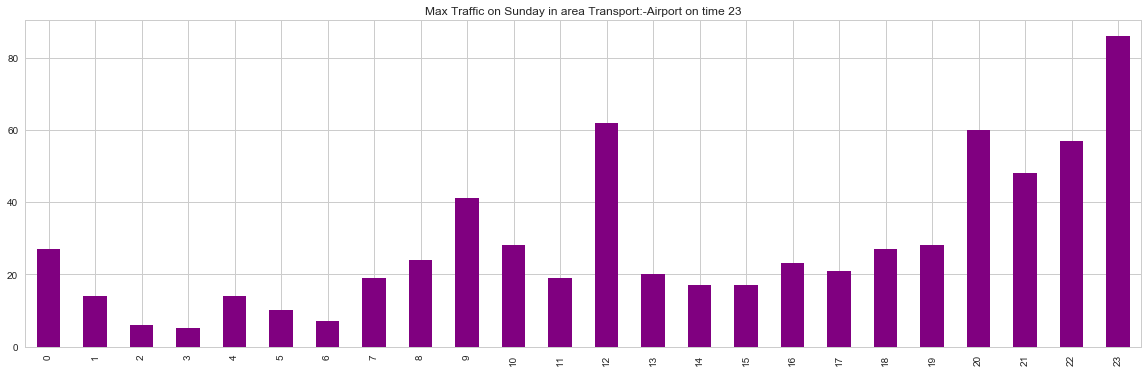

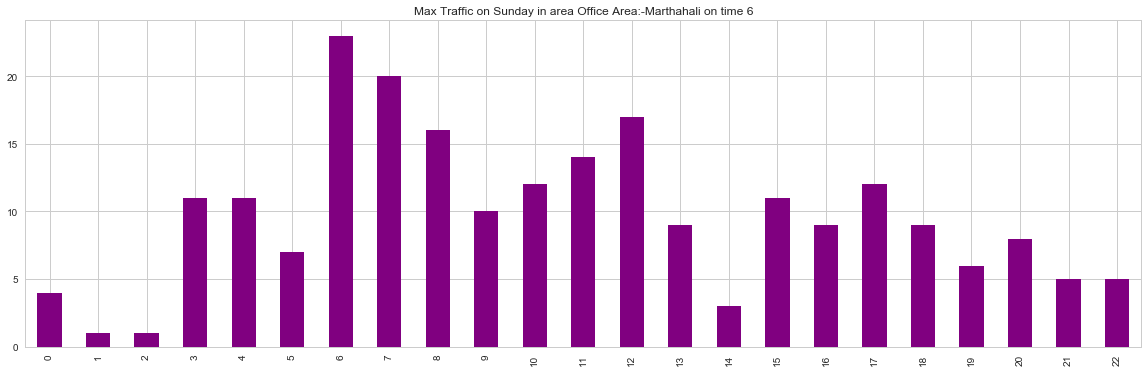

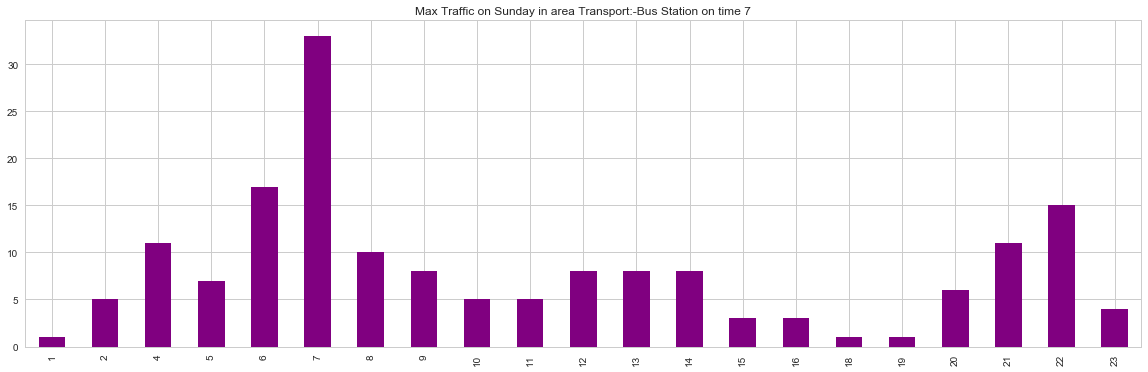

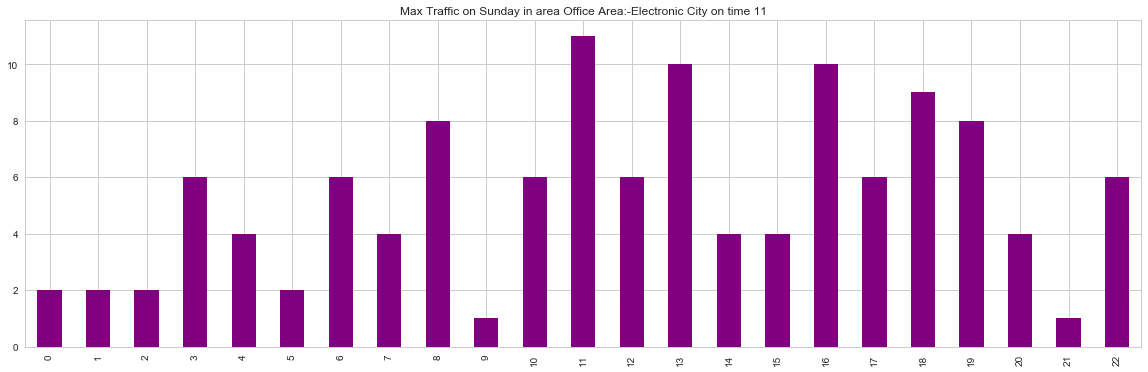

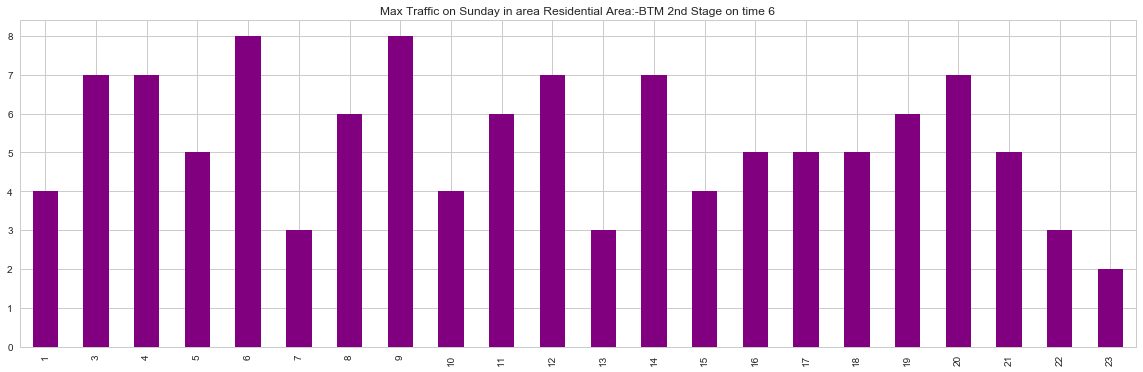

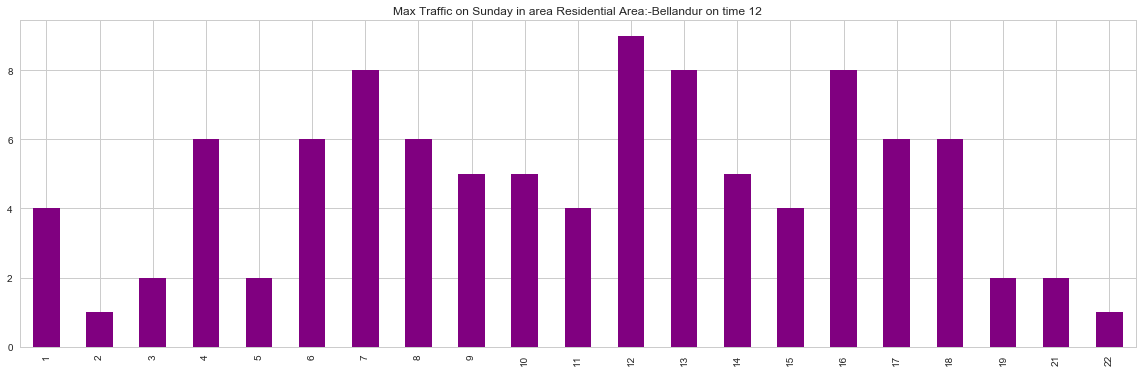

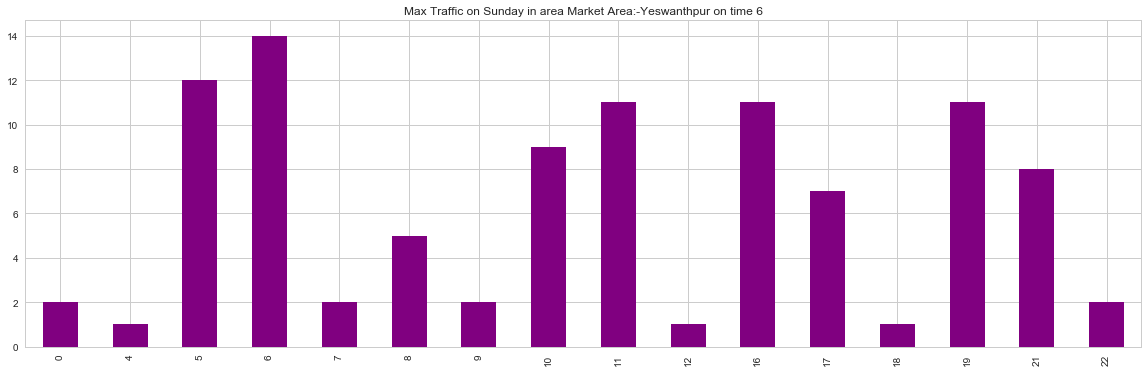

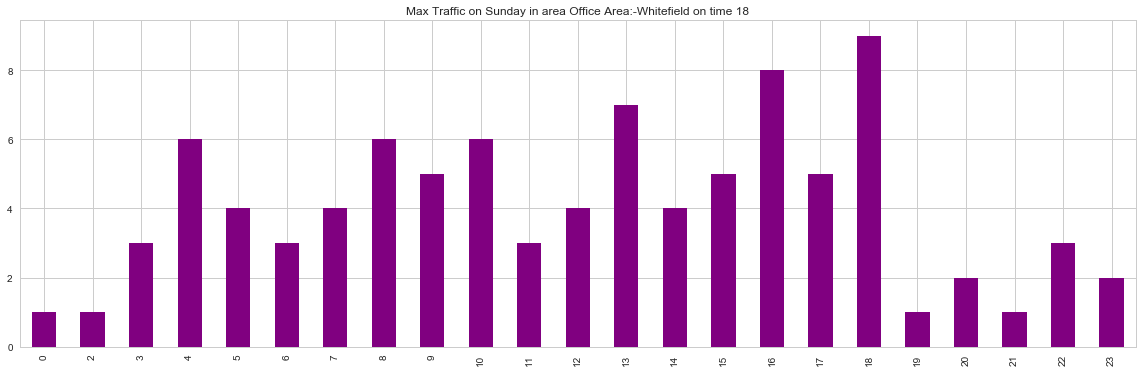

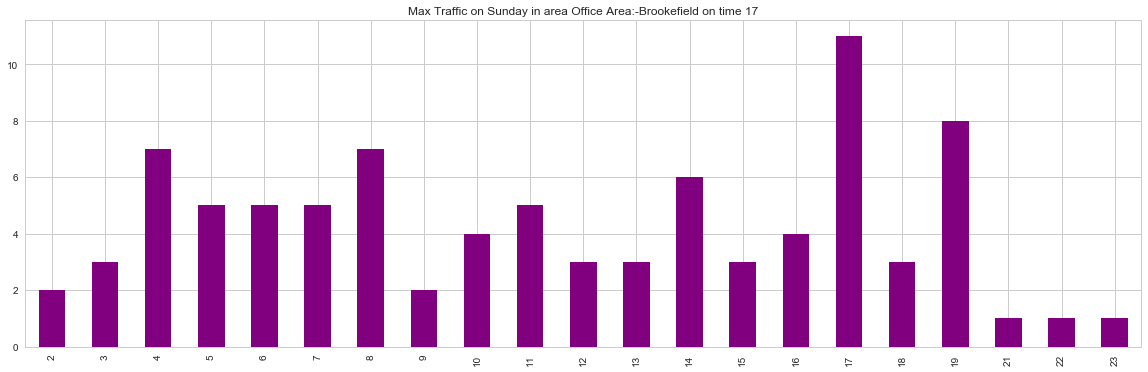

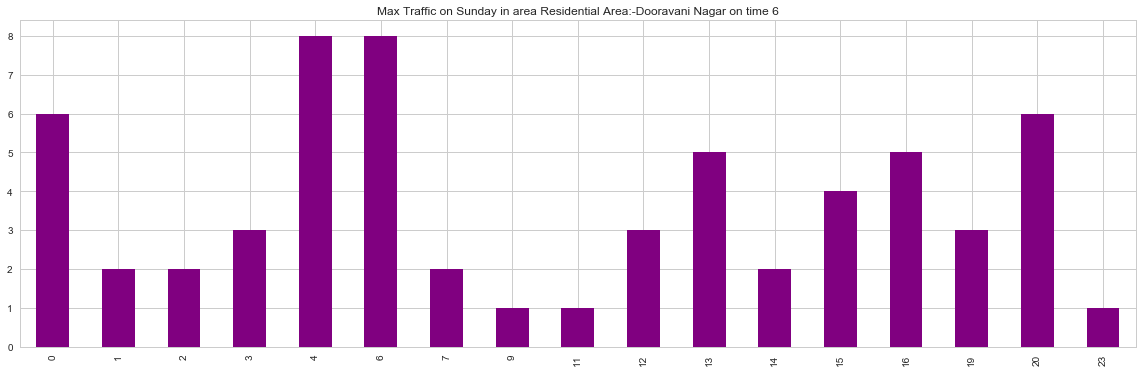

In [29]:
for i in area_code_sun:
    day_sunday[day_sunday['from_area_id']==i]['start_time'].value_counts().sort_index().plot.bar(figsize = (20,6), color='purple')
    plt.title("Max Traffic on Sunday in area "+area_dict.get(i)+" on time "+str(day_sunday[day_sunday['from_area_id']==i]['start_time'].value_counts().index[0]))
    plt.show()

# Inference of Above Graph on Sunday
## For Office Area in Bangalore Most of Traffic :
### ->Marthahali 6:00 - 8: 00
### ->Electronic City 11:00 -12:00 and  16:00 - 19:00
### ->Brookefield  17:00 - 21:00
### ->Whitefield 16:00 -18:00

## For Residental Area in Bangalore Most of Traffic: 
### ->Bellandur 12:00 - 14:00
### ->Dooravani Nagar: 4:00 - 5:00 and 6:00 - 7: 00 
### ->BTM 2nd Stage : Always Busy

## For Market Area in Bangalore Most of Traffic: 
### Yeswanthpur: 7:00 - 8:00

## For Transport Area in Bangalore Most of Traffic:
### ->Airport: 22:00 - 0:00
### ->Bus Station 6:00 - 8:00

# Increase the supply of Cab in this specfic area in this time-slot 

# ------------------------------------------------

# From above analysis we finded the important key Point:
## -> The Weeksday i.e Monday to Friday follows same pattern.
## -> In Weeksday ,the early morning has more traffic in residential area and in evening there is more traffic in office area
## The Saturday have more traffic in Market Area at 20:00 - 22: 00
## Whole Data is divided into three category:WeeksDay,Sunday and Saturday.Their is sepicific time of traffic in Transport Area in these three category.
## Here we will develop surge strategy and to give incestives to driver by doing surge pricing of cabs at peak hour

# Utliziation of Cabs

## As we know from above analysis where and when the cabs demands are high so find increasing the cabs in specific area and time can solve the problem of utlization of cabs 

# Travel Type

## Long Distance Travel

In [30]:
long_distance=data[data['travel_type_id']==1]

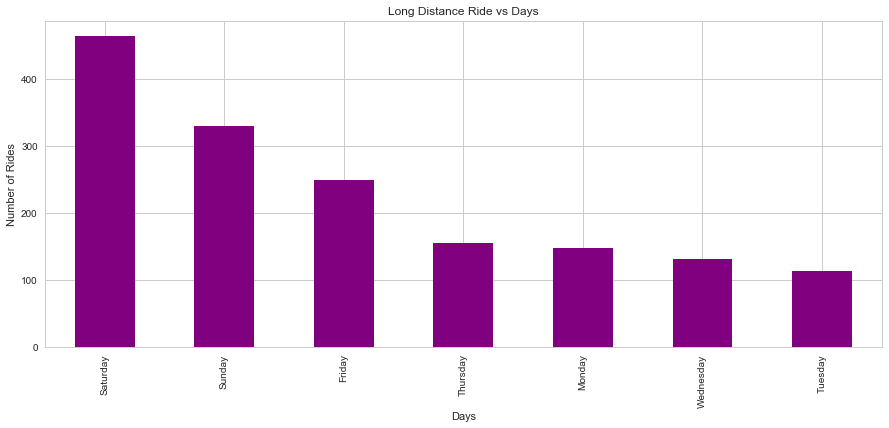

In [65]:
long_distance['start_day'].value_counts().plot.bar(figsize=(15,6), color='purple')
plt.title("Long Distance Ride vs Days")
plt.xlabel("Days")
plt.ylabel("Number of Rides")
plt.show()

## Cancellation

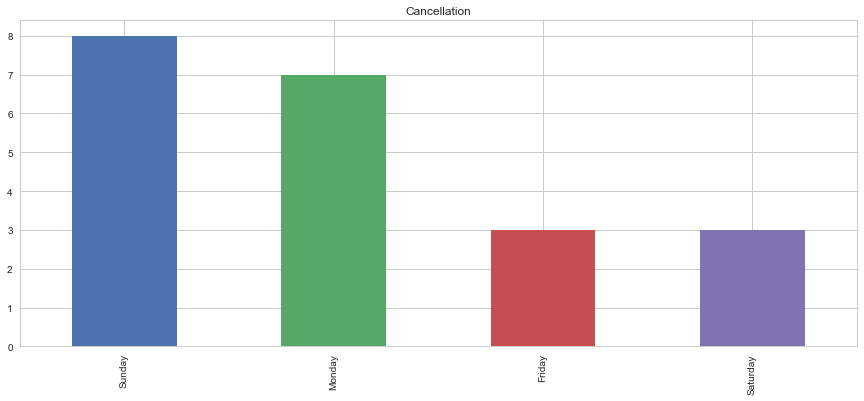

In [66]:
long_distance[long_distance['Car_Cancellation']==1]['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.title("Cancellation")
plt.show()

### Long Distance Travel are mostly done on weekends or on Friday Night
#### Most of Cancelleation of Ride is done Monday and Sunday
#### So pricing of cab for long distance should go up on weekends to met the demand of customers and this will boost the incenstives of driver 

# Point to Point

In [33]:
point_to_point=data[data['travel_type_id']==2]

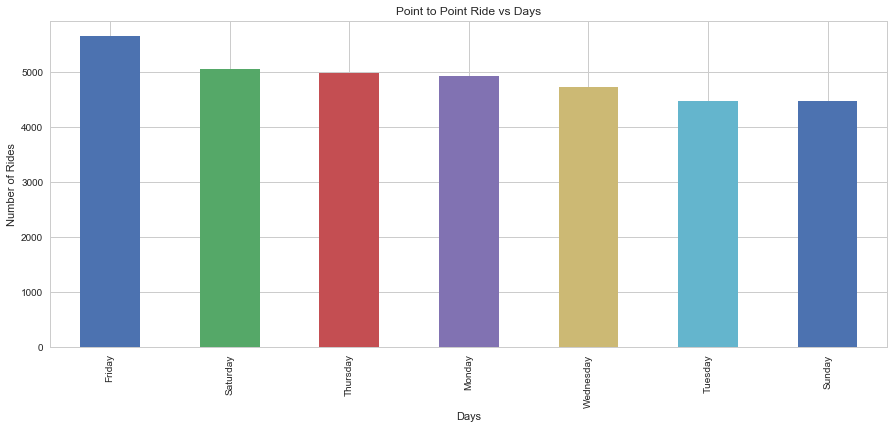

In [68]:
point_to_point['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.title("Point to Point Ride vs Days")
plt.xlabel("Days")
plt.ylabel("Number of Rides")
plt.show()

## Cancellation

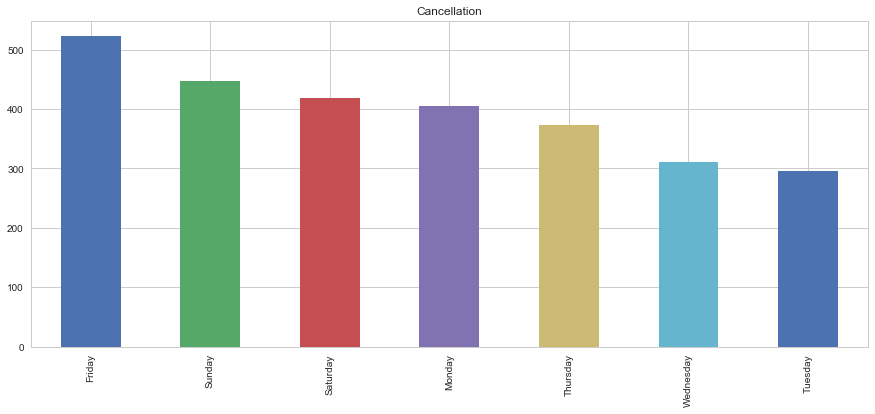

In [67]:
point_to_point[point_to_point['Car_Cancellation']==1]['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.title("Cancellation")
plt.show()

### Point to Point travel is genrally used by office people in weekdays and saturday 
#### Here Point to Point Cancellation increases drastically on Sunday due to shortage of cabs on Sunday Since long distance and hourly rent takes the major cab share.


# Hourly Rent

In [36]:
hourly_rent=data[data['travel_type_id']==3]

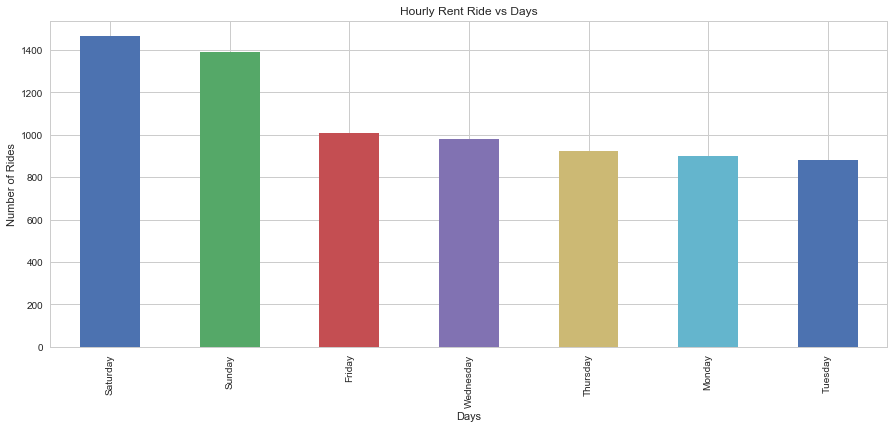

In [69]:
hourly_rent['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.title("Hourly Rent Ride vs Days")
plt.xlabel("Days")
plt.ylabel("Number of Rides")
plt.show()

## Cancellation

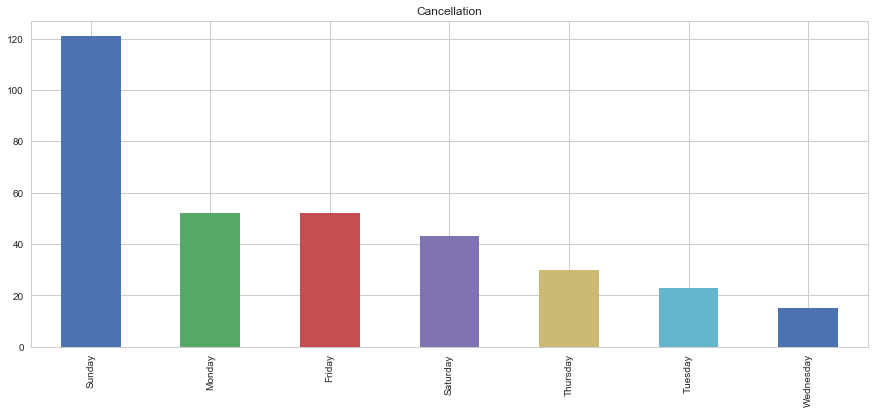

In [70]:
hourly_rent[hourly_rent['Car_Cancellation']==1]['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.title("Cancellation")
plt.show()

### Hourly Rent travel is mostly used during weekend
#### Most of the cancellation of cab is done on Sunday

# Cancellation of Cab Day Wise

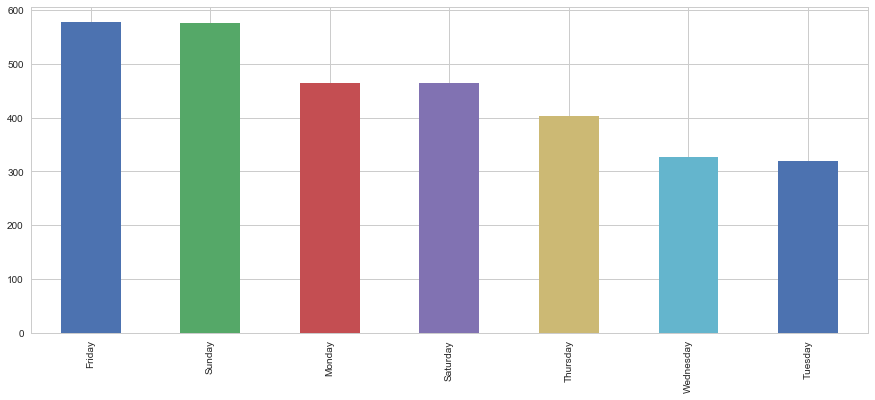

In [39]:
data[data['Car_Cancellation']==1]['start_day'].value_counts().plot.bar(figsize=(15,6))
plt.show()

## Generally the is no specific trends of Cancellation of Cab Day Wise

In [40]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,start_date,start_time,start_day
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,...,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1/1/2013,2,Tuesday
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1/1/2013,9,Tuesday
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,...,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1/1/2013,3,Tuesday
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,...,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1/1/2013,5,Tuesday
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1/1/2013,9,Tuesday


## User responsible for car cancellation

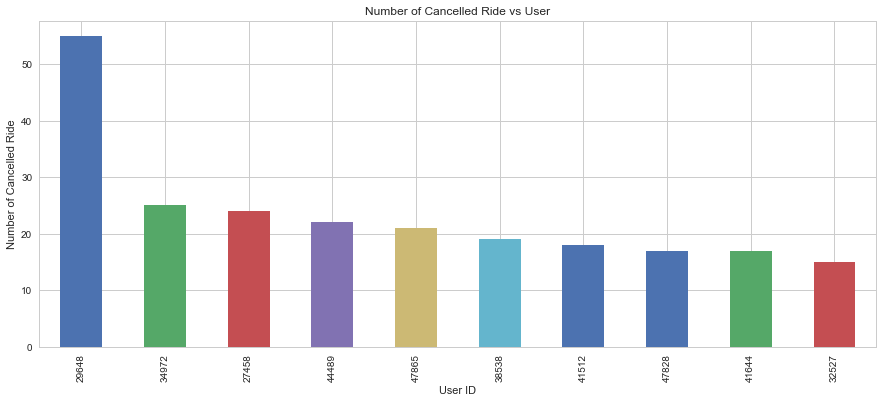

In [41]:
data[data['Car_Cancellation']==1]['user_id'].value_counts().head(10).plot.bar(figsize=(15,6))
plt.ylabel("Number of Cancelled Ride")
plt.title("Number of Cancelled Ride vs User")
plt.xlabel("User ID")
plt.show()

### We can see that some user has most number of cancelled ride before taking action against user let take out the details of user 

In [42]:
user_list=data[data['Car_Cancellation']==1]['user_id'].value_counts().head(10).index
user_cancel=data[data['Car_Cancellation']==1]['user_id'].value_counts().head(10).values

In [43]:
user_percent=[]
for i in range(len(user_list)):
    percent=(user_cancel[i]/data[data['user_id']==user_list[i]].shape[0]) * 100
    user_percent.append(percent)

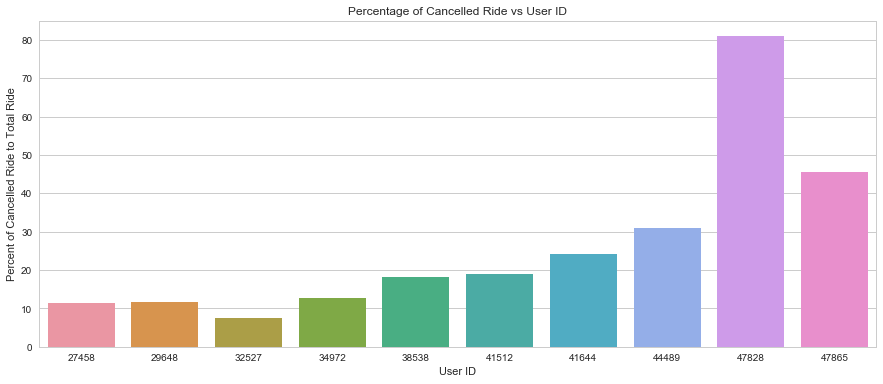

In [50]:
fig, ax =plt.subplots(figsize=(15,6))
sns.barplot(ax=ax,x=user_list,y=user_percent,data=tips)
plt.title("Percentage of Cancelled Ride vs User ID")
plt.xlabel("User ID")
plt.ylabel("Percent of Cancelled Ride to Total Ride")
plt.show()

## Two User have more cancellation percent 
### User ID- 47828 : 81%
### User ID- 47865: 46% 
### There are doubtful user the cab company should take some action and run the analysis whether user invovled in some fraud or not this will reduce the cost

### City

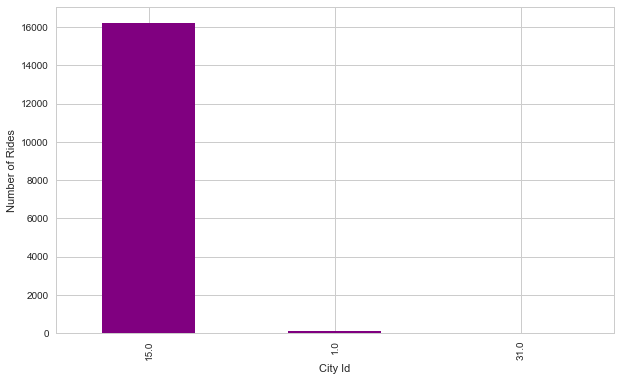

We will analyse this data only for city_id 15.0 to find the demands in an area or with time of day


In [45]:
data['from_city_id'].value_counts().plot.bar(x='City id', y='Number of Rides',figsize = (10,6), color='purple')
plt.xlabel("City Id")
plt.ylabel('Number of Rides')
plt.show()
print("We will analyse this data only for city_id 15.0 to find the demands in an area or with time of day")

In [51]:
data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,start_date,start_time,start_day
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,...,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1/1/2013,2,Tuesday
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1/1/2013,9,Tuesday
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,...,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1/1/2013,3,Tuesday
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,...,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1/1/2013,5,Tuesday
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,...,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1/1/2013,9,Tuesday


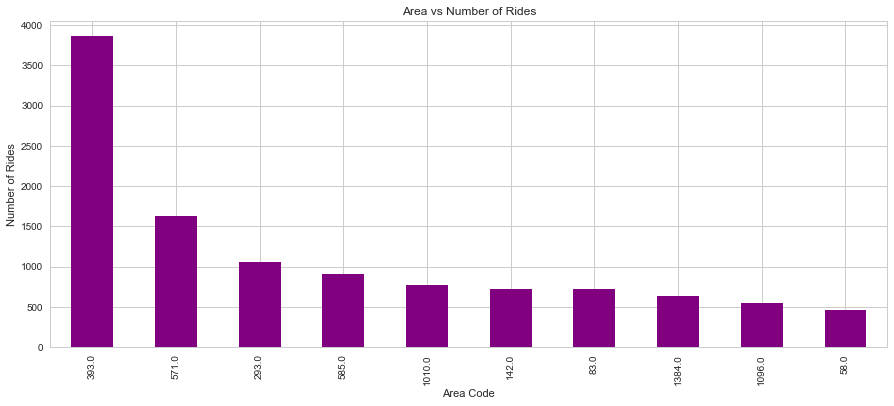

In [55]:
data['from_area_id'].value_counts().head(10).plot.bar(figsize = (15,6), color='purple')
plt.xlabel("Area Code")
plt.ylabel('Number of Rides')
plt.title("Area vs Number of Rides")
plt.show()

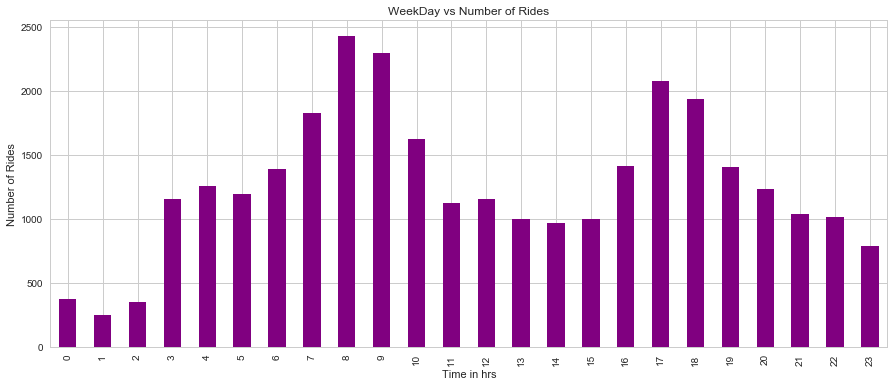

In [61]:
data[(data['start_day']!='Saturday') &(data['start_day']!='Sunday')]['start_time'].value_counts().sort_index().plot.bar(figsize = (15,6), color='purple')
plt.title('WeekDay vs Number of Rides')
plt.xlabel("Time in hrs")
plt.ylabel("Number of Rides")
plt.show()

In [46]:
City ID=15.0 

SyntaxError: invalid syntax (<ipython-input-46-bd8239e18395>, line 1)